In [145]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import datetime as dt

In [146]:
files = glob.glob( "project_data/daily-temperature*.csv")
daily_temps = pd.concat(pd.read_csv(f) for f in files)

In [147]:
daily_temps.columns = daily_temps.columns.str.lower()

In [148]:
daily_temps.head()

,region,country,state,city,month,day,year,avgtemperature
0,Australia/South Pacific,Australia,NaN,Brisbane,1,1,1995,76.1
1,Australia/South Pacific,Australia,NaN,Brisbane,1,2,1995,78.3
2,Australia/South Pacific,Australia,NaN,Brisbane,1,3,1995,78.6
3,Australia/South Pacific,Australia,NaN,Brisbane,1,4,1995,78.6
4,Australia/South Pacific,Australia,NaN,Brisbane,1,5,1995,78.3


The data looks like it has some temperature values at -99. Looking at the documentation these values are coded missing values.

<AxesSubplot:>

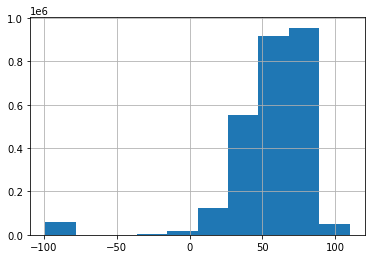

In [149]:
daily_temps.avgtemperature.hist()

It appears there are also some temperature records from before 1995 which is likely an error.

<AxesSubplot:>

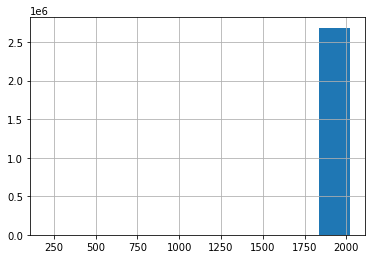

In [150]:
daily_temps.year.hist()

In [151]:
daily_temps.day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  0])

Values outside of expected range:

In [152]:
print(daily_temps.year[daily_temps.year < 1995].unique())
print(daily_temps.avgtemperature[daily_temps.avgtemperature < -50].unique())
print(daily_temps.day[(daily_temps.day < 1) | (daily_temps.day > 31)].unique())

[201 200]
[-99.]
[0]


Replacing the values with proper missing values.

In [153]:
daily_temps.avgtemperature.replace(-99, None, inplace=True)
daily_temps.year.replace([200, 201], None, inplace=True)
# Change day 0 to 1
daily_temps.day.replace(0, 1, inplace=True)

Checking that all data is in the expected range:

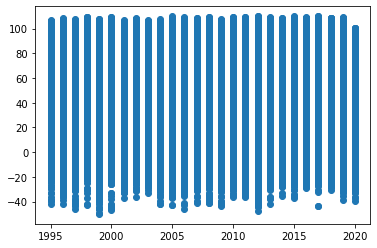

In [154]:
plt.scatter(x = daily_temps.year, y = daily_temps.avgtemperature)
plt.show()

The data is currently in farenheit and I would prefer to analyse it in celcius as it is easier to contextualise. Here I'm defining a function to convert the values and creating a new column with pandas.

In [155]:
def to_celcius(x):
    return (x - 32) * 5/9

In [156]:
daily_temps["avg_temp_c"] = to_celcius(daily_temps.avgtemperature)
daily_temps.head()

,region,country,state,city,month,day,year,avgtemperature,avg_temp_c
0,Australia/South Pacific,Australia,NaN,Brisbane,1,1,1995,76.1,24.500000
1,Australia/South Pacific,Australia,NaN,Brisbane,1,2,1995,78.3,25.722222
2,Australia/South Pacific,Australia,NaN,Brisbane,1,3,1995,78.6,25.888889
3,Australia/South Pacific,Australia,NaN,Brisbane,1,4,1995,78.6,25.888889
4,Australia/South Pacific,Australia,NaN,Brisbane,1,5,1995,78.3,25.722222


In [159]:
daily_temps['date'] =  pd.to_datetime(daily_temps[["year", "month", "day"]])
daily_temps.head()

,region,country,state,city,month,day,year,avgtemperature,avg_temp_c,date
0,Australia/South Pacific,Australia,NaN,Brisbane,1,1,1995,76.1,24.500000,1995-01-01
1,Australia/South Pacific,Australia,NaN,Brisbane,1,2,1995,78.3,25.722222,1995-01-02
2,Australia/South Pacific,Australia,NaN,Brisbane,1,3,1995,78.6,25.888889,1995-01-03
3,Australia/South Pacific,Australia,NaN,Brisbane,1,4,1995,78.6,25.888889,1995-01-04
4,Australia/South Pacific,Australia,NaN,Brisbane,1,5,1995,78.3,25.722222,1995-01-05


# Making a plot of temps

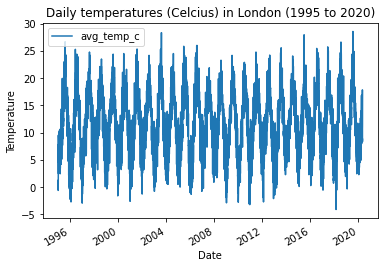

In [170]:
london = daily_temps[daily_temps.city == "London"]
london.plot(x = "date", y = "avg_temp_c")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Daily temperatures (Celcius) in London (1995 to 2020)")
plt.show()


# Temperature Extremes


1. How do I omit NAs from Agg?

In [186]:
london_monthly_range = london.groupby(["year", "month"]).avg_temp_c.agg([max, min]).reset_index()
london_monthly_range.head()


,year,month,max,min
0,1995,1,9.611111,-0.611111
1,1995,2,10.611111,3.888889
2,1995,3,12.055556,2.444444
3,1995,4,14.333333,5.111111
4,1995,5,19.944444,7.666667


2. How do I pivot this longer to have a row for max and min observation for each year & month?

In [190]:
pd.wide_to_long(london_monthly_range, )


month                                                         \
max   9.611111   10.611111  12.055556  14.333333  19.944444  22.888889   
min  -0.611111   3.888889   2.444444   5.111111   7.666667   11.166667   
year                                                                     
1995        1.0        2.0        3.0        4.0        5.0        6.0   
1996        NaN        NaN        NaN        NaN        NaN        NaN   
1997        NaN        NaN        NaN        NaN        NaN        NaN   
1998        NaN        NaN        NaN        NaN        NaN        NaN   
1999        NaN        NaN        NaN        NaN        NaN        NaN   
2000        NaN        NaN        NaN        NaN        NaN        NaN   
2001        NaN        NaN        NaN        NaN        NaN        NaN   
2002        NaN        NaN        NaN        NaN        NaN        NaN   
2003        NaN        NaN        NaN        NaN        NaN        NaN   
2004        NaN        NaN        NaN        NaN        NaN        NaN   
2005        NaN        NaN        NaN        NaN        NaN        NaN   
2006        NaN        NaN        NaN        NaN        NaN        NaN   
2007        NaN        NaN        NaN        NaN        NaN        NaN   
2008        NaN        NaN        NaN        NaN        NaN        NaN   
2009        NaN        NaN        NaN        NaN        NaN        NaN   
2010        NaN        NaN        NaN        NaN        NaN        NaN   
2011        NaN        NaN        NaN        NaN        NaN        NaN   
2012        NaN        NaN        NaN        NaN        NaN        NaN   
2013        NaN        NaN        NaN        NaN        NaN        NaN   
2014        NaN        NaN        NaN        NaN        NaN        NaN   
2015        NaN        NaN        NaN        NaN        NaN        NaN   
2016        NaN        NaN        NaN        NaN        NaN        NaN   
2017        NaN        NaN        NaN        NaN        NaN        NaN   
2018        NaN        NaN        NaN        NaN        NaN        NaN   
2019        NaN        NaN        NaN        NaN        NaN        NaN   
2020        NaN        NaN        NaN        NaN        NaN        NaN   

                                                  ...                        \
max   25.444444  26.666667  17.333333  18.277778  ...  24.888889  18.444444   
min   15.333333  14.944444  9.333333   7.888889   ...  15.611111  12.777778   
year                                              ...                         
1995        7.0        8.0        9.0       10.0  ...        NaN        NaN   
1996        NaN        NaN        NaN        NaN  ...        NaN        NaN   
1997        NaN        NaN        NaN        NaN  ...        NaN        NaN   
1998        NaN        NaN        NaN        NaN  ...        NaN        NaN   
1999        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2000        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2001        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2002        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2003        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2004        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2005        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2006        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2007        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2008        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2009        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2010        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2011        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2012        NaN        NaN        NaN        NaN  ...        NaN        NaN   
2013        NaN        NaN        NaN        NaN  .